In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def display_level_image(col_dim, level, col_name_to_image):
    level_image = Image.new("RGB", (col_dim[0] * len(level), col_dim[1] ))
    for i in range(len(level)):
        level_image.paste(col_name_to_image[level[i]],(i * col_dim[0], 0, (i+1) * col_dim[0], col_dim[1]))
    
    plt.figure()
    plt.imshow(level_image)
    plt.show()

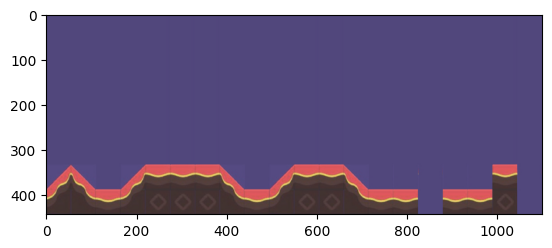

In [3]:
col_name_to_image = {}
columns = ["A", "B", "C", "D", "E", "F", "G", "H"]
for col in columns:
    col_name_to_image[col] = Image.open(f'columns/{col}.png')
example_level = ["C","G", "A", "C", "H", "H", "H", "G", "A", "C", "H", "H", "G", "A", "A", "E", "A", "A", "H", "E"]
col_dim = col_name_to_image["A"].size

display_level_image(col_dim, example_level, col_name_to_image)

In [4]:
next_col_frequencies = {}
for i in range(len(example_level) - 1):
    col = example_level[i]
    if col in next_col_frequencies:
        next_col_frequency = next_col_frequencies[col]
    else:
        next_col_frequency = {}

    next_col = example_level[i+1]
    if next_col in next_col_frequency:
        next_col_frequency[next_col] += 1
    else:
        next_col_frequency[next_col] = 1

    next_col_frequencies[col] = next_col_frequency

print(next_col_frequencies)

{'C': {'G': 1, 'H': 2}, 'G': {'A': 3}, 'A': {'C': 2, 'A': 2, 'E': 1, 'H': 1}, 'H': {'H': 3, 'G': 2, 'E': 1}, 'E': {'A': 1}}


In [5]:
relative_probabilities = {}
smoothing_alpha = 0.05
for conditional in columns:
    conditional_prob = {}
    total_conditional = sum(conditional_prob.values())
    for col in columns:
        if conditional in next_col_frequencies and col in next_col_frequencies[conditional]:
            observed_count = next_col_frequencies[conditional][col]
        else:
            observed_count = 0
        conditional_prob[col] = (observed_count + smoothing_alpha) / (total_conditional + smoothing_alpha * len(columns))
    relative_probabilities[conditional] = conditional_prob

print(relative_probabilities)

{'A': {'A': 5.124999999999999, 'B': 0.125, 'C': 5.124999999999999, 'D': 0.125, 'E': 2.625, 'F': 0.125, 'G': 0.125, 'H': 2.625}, 'B': {'A': 0.125, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 0.125, 'H': 0.125}, 'C': {'A': 0.125, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 2.625, 'H': 5.124999999999999}, 'D': {'A': 0.125, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 0.125, 'H': 0.125}, 'E': {'A': 2.625, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 0.125, 'H': 0.125}, 'F': {'A': 0.125, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 0.125, 'H': 0.125}, 'G': {'A': 7.624999999999999, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 0.125, 'F': 0.125, 'G': 0.125, 'H': 0.125}, 'H': {'A': 0.125, 'B': 0.125, 'C': 0.125, 'D': 0.125, 'E': 2.625, 'F': 0.125, 'G': 5.124999999999999, 'H': 7.624999999999999}}


['C', 'H', 'G', 'B', 'H', 'E', 'A', 'C', 'H', 'H']


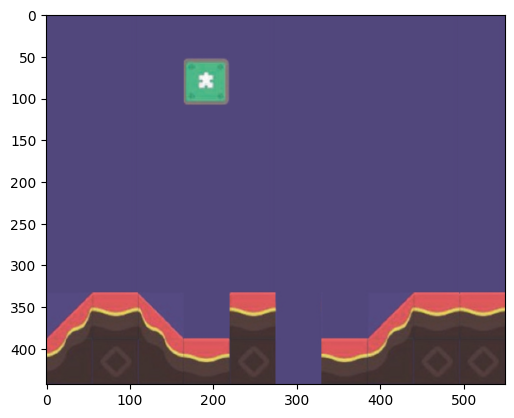

In [26]:
level_length = 10
first_col = np.random.choice(columns)[0]
generated_level = [first_col]

for i in range(1, level_length):
    prev_col = generated_level[i - 1]
    options_freqs = relative_probabilities[prev_col]
    chosen_col = random.choices(list(options_freqs.keys()), weights=list(options_freqs.values()), k=1)[0]
    generated_level.append(chosen_col)

print(generated_level)
display_level_image(col_dim, generated_level, col_name_to_image)